## Introduction
In this notebook, we work with ```IBM HR Analytics Employee Attrition & Performance``` dataset. We do - 
- Data Analysis & Pre-processing
- Correlation Analysis
- Fit a Machine Learning Model

## Dataset
The dataset is used to understand the factors that contribute to employee attrition (indicating whether an employee has left the company (Yes/No) ) and to build models that can predict which employees are likely to leave.

The dataset consists of ```35 columns (features) and 1470 rows (employee records).```
- ```Personal Attributes:``` Age, Gender, Marital Status, Education, etc.
- ```Job-Related Attributes:``` Job Role, Department, Job Level, Job Satisfaction, etc.
- ```Performance Metrics:``` Years at Company, Years in Current Role, Performance Rating, etc.
- ```Compensation:``` Monthly Income, Stock Option Level, etc.
- ```Attrition:``` The target variable, indicating whether an employee has left the company (Yes/No).

## Data Analysis & Pre-processing

### Understanding the Dataset



In [141]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# loading data
data_path = "./IBM-HR-Analytics-Employee-Attrition-and-Performance.csv"
data_df = pd.read_csv(data_path)
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [143]:
print(f"The dataset has {data_df.shape[0]} rows and {data_df.shape[1]} columns")

The dataset has 1470 rows and 35 columns


In [144]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [145]:
data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [146]:
config = {
    "scaling": "minmax",
}

### Data Cleaning

In [147]:
# number of missing values
for column in data_df.columns:
    print(f"Number of missing values in {column} : {data_df[column].isnull().sum()}")

Number of missing values in Age : 0
Number of missing values in Attrition : 0
Number of missing values in BusinessTravel : 0
Number of missing values in DailyRate : 0
Number of missing values in Department : 0
Number of missing values in DistanceFromHome : 0
Number of missing values in Education : 0
Number of missing values in EducationField : 0
Number of missing values in EmployeeCount : 0
Number of missing values in EmployeeNumber : 0
Number of missing values in EnvironmentSatisfaction : 0
Number of missing values in Gender : 0
Number of missing values in HourlyRate : 0
Number of missing values in JobInvolvement : 0
Number of missing values in JobLevel : 0
Number of missing values in JobRole : 0
Number of missing values in JobSatisfaction : 0
Number of missing values in MaritalStatus : 0
Number of missing values in MonthlyIncome : 0
Number of missing values in MonthlyRate : 0
Number of missing values in NumCompaniesWorked : 0
Number of missing values in Over18 : 0
Number of missing v

In [148]:
# number of duplicates
data_df.duplicated().sum()

0

### Conversion of Features to Numeric

In [149]:
data_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [150]:
# number of unique values and the unique values in categorical columns
categorical_columns = data_df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    print(f"{column}: {data_df[column].nunique()}")
    print(f"{data_df[column].unique()}\n")

Attrition: 2
['Yes' 'No']

BusinessTravel: 3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: 3
['Sales' 'Research & Development' 'Human Resources']

EducationField: 6
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: 2
['Female' 'Male']

JobRole: 9
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: 3
['Single' 'Married' 'Divorced']

Over18: 1
['Y']

OverTime: 2
['Yes' 'No']



In [151]:
# convert categorical columns data type to category
data_df[categorical_columns] = data_df[categorical_columns].astype("category")
data_df.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [152]:
# one-hot encoding for the categorical columns having more than 2 unique values and label encoding for the rest
from sklearn.preprocessing import LabelEncoder

label_encoded_cols = []
one_hot_encoded_cols = []

for column in categorical_columns:
    if data_df[column].nunique() <= 2:
        label_encoded_cols.append(column)
    else:
        one_hot_encoded_cols.append(column)

for column in label_encoded_cols:
    le = LabelEncoder()
    data_df[column] = le.fit_transform(data_df[column])

data_df = pd.get_dummies(data_df, columns=one_hot_encoded_cols)

In [153]:
data_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,True,False,False,False,False,False,False,False,True,False


### Scaling the Features

In [154]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(_data_df: pd.DataFrame, _scaler_type: str = "standard") -> pd.DataFrame:
    if _scaler_type == "standard":
        scaler = StandardScaler()
    elif _scaler_type == "minmax":
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler type. Please use 'standard' or 'minmax'")
    
    # leaving out the categorical columns (having dtype category) from scaling
    categorical_columns = _data_df.select_dtypes(include=["category"]).columns
    numerical_df = _data_df.copy()
    numerical_df = numerical_df.drop(columns=categorical_columns)
    scaled_data_df = scaler.fit_transform(numerical_df)
    scaled_data_df = pd.DataFrame(scaled_data_df, columns=numerical_df.columns)

    # merging the scaled numerical features with the categorical columns
    scaled_data_df[categorical_columns] = _data_df[categorical_columns]
    return scaled_data_df


In [155]:
data_df = scale_features(data_df, config["scaling"])
data_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [156]:
features_df = data_df.drop(columns=["Attrition"])
labels_df = data_df["Attrition"]
labels_df = pd.DataFrame(labels_df, columns=["Attrition"])

In [157]:
features_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
labels_df.head()

,Attrition
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


## Correlation Analysis

In [159]:
def visulaize_correlation_matrix(_data_df: pd.DataFrame, _title: str, _figsize: tuple = (40, 40)):
    plt.figure(figsize = _figsize)
    sns.heatmap(_data_df.corr(), annot=True, fmt=".2f")
    plt.title(_title, fontsize=20)
    plt.show()

def get_top_correlated_features(_features_df: pd.DataFrame, _labels_df: pd.DataFrame, _top_n: int = 20) -> pd.DataFrame:
    correlations = _features_df.corrwith(_labels_df["Attrition"])
    correlations = correlations.abs().sort_values(ascending=False)
    top_correlated_features = correlations.head(_top_n)
    top_correlated_features_df = _features_df[top_correlated_features.index]
    return top_correlated_features_df

def get_correlation_values(_features_df: pd.DataFrame, _labels_df: pd.DataFrame) -> pd.DataFrame:
    correlations = _features_df.corrwith(_labels_df["Attrition"])
    correlations = correlations.abs().sort_values(ascending=False)
    return correlations

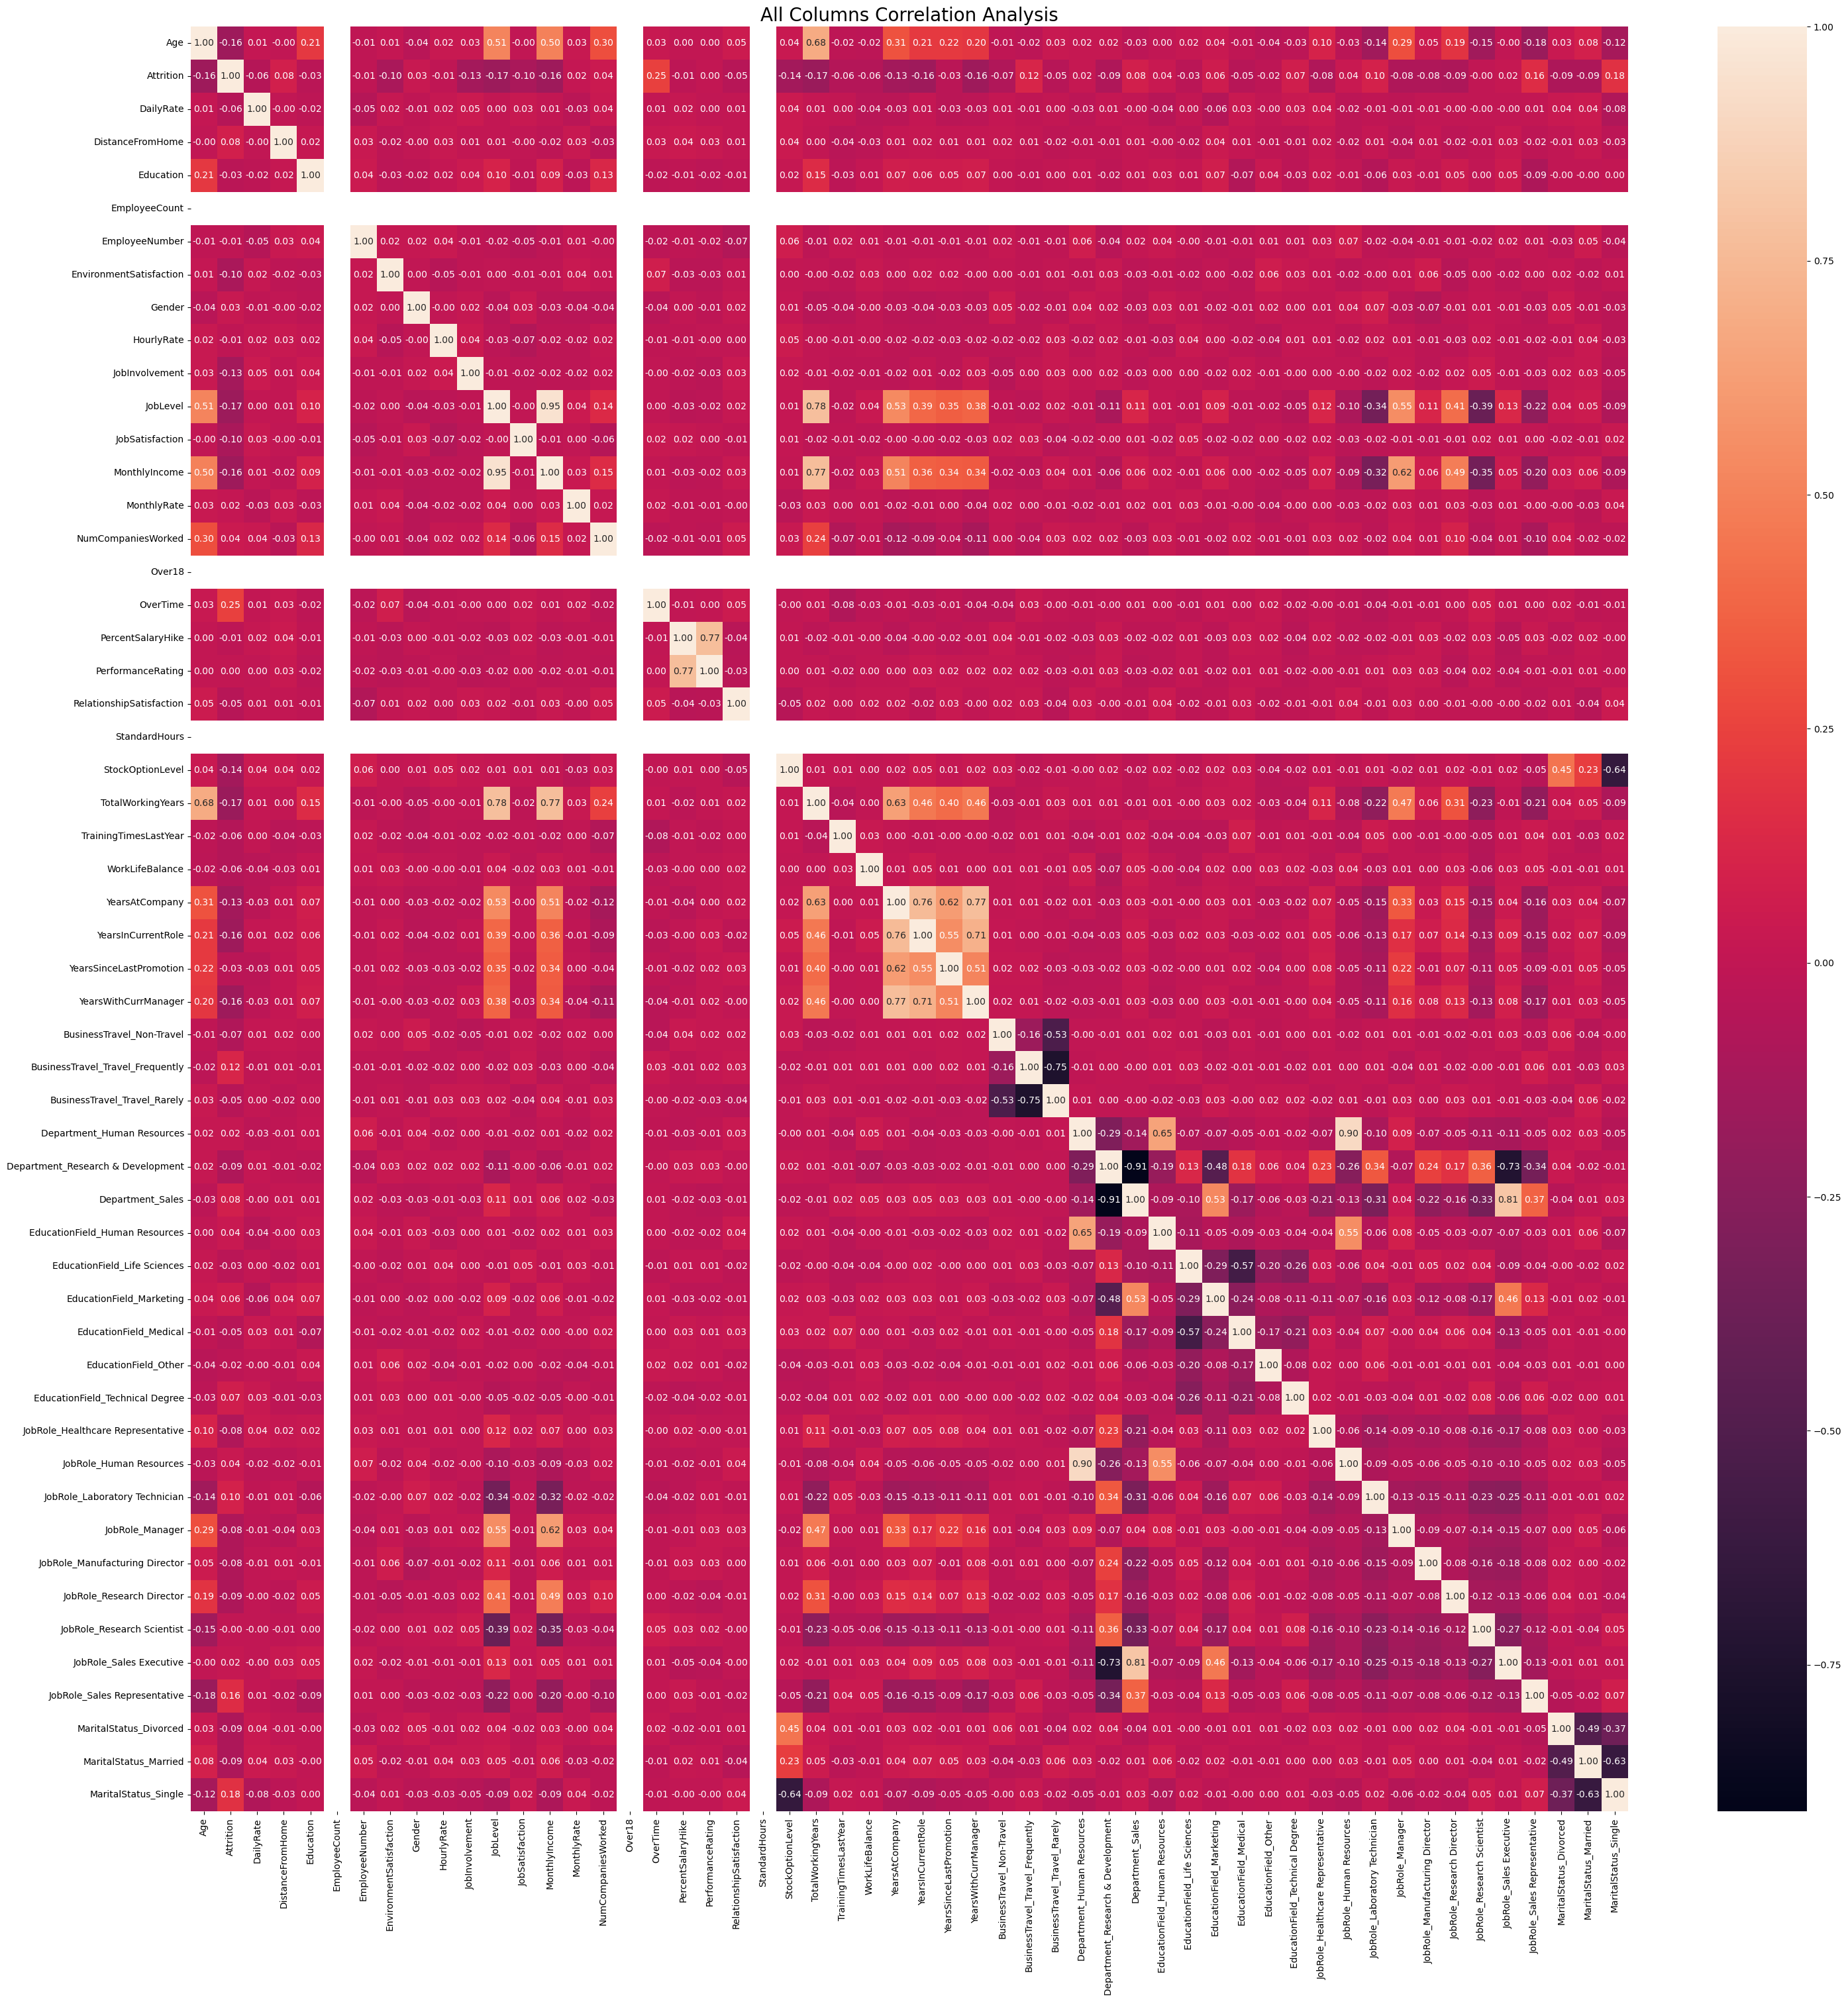

In [160]:
visulaize_correlation_matrix(data_df, "All Columns Correlation Analysis" ,(35, 35))

In [161]:
print(get_correlation_values(features_df, labels_df))

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director    

/home/asifazad/installations/miniconda3/envs/ml/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/asifazad/installations/miniconda3/envs/ml/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [162]:
features_df = get_top_correlated_features(features_df, labels_df, 20)

In [163]:
print(get_correlation_values(features_df, labels_df))

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
dtype: float64


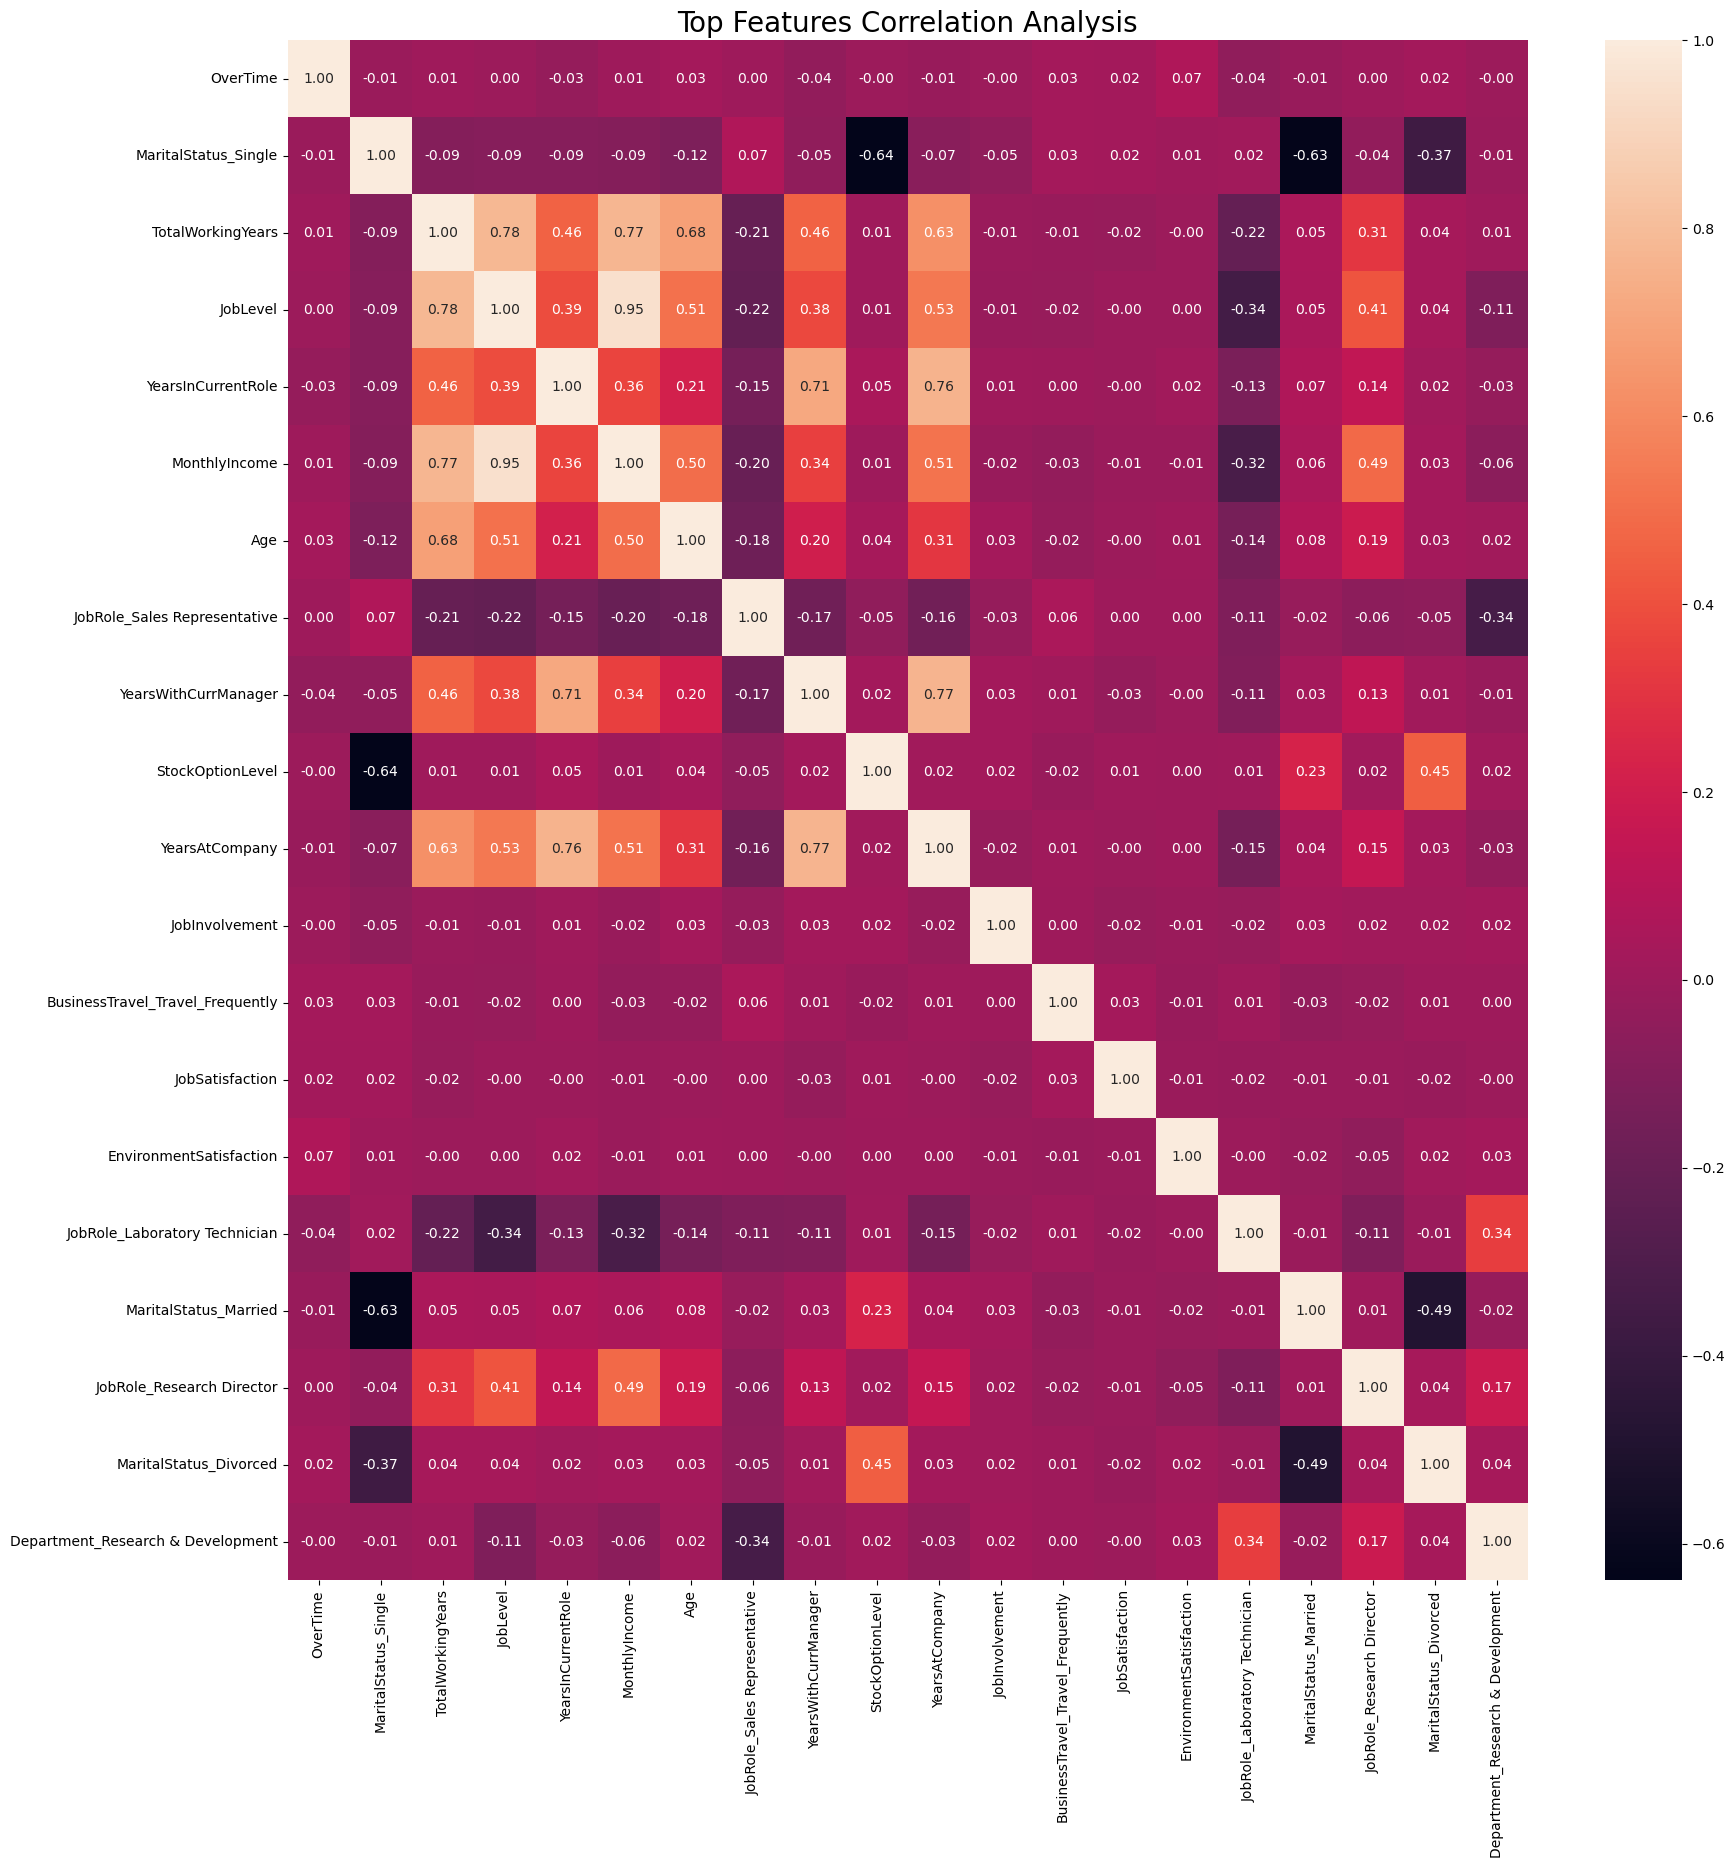

In [164]:
visulaize_correlation_matrix(features_df, "Top Features Correlation Analysis", (20, 20))

In [165]:
def draw_scatter_plot(_features_df: pd.DataFrame, _labels_df: pd.DataFrame) -> None:
    for column in _features_df.columns:
        plt.scatter(_features_df[column], _labels_df['Attrition'], alpha=0.05)
        plt.xlabel(column)
        plt.ylabel("Attrition")
        plt.title(f"{column} vs Attrition")
        plt.show()

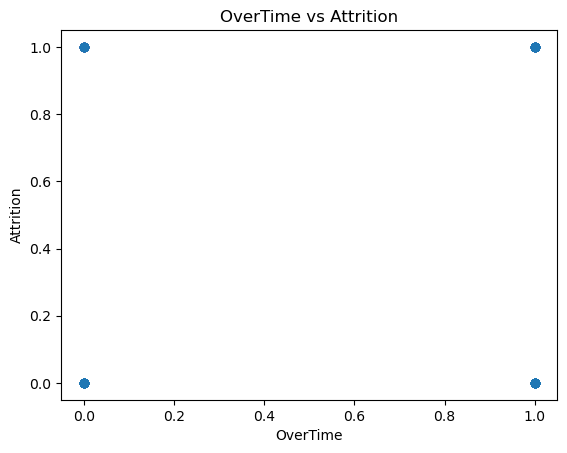

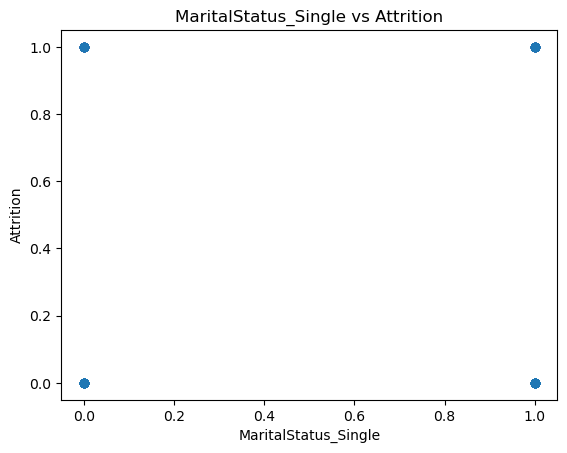

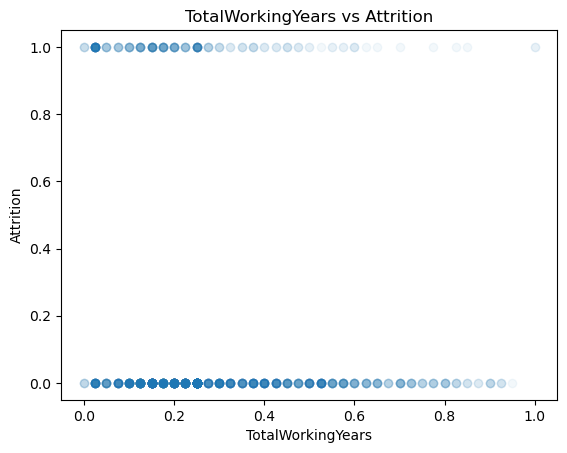

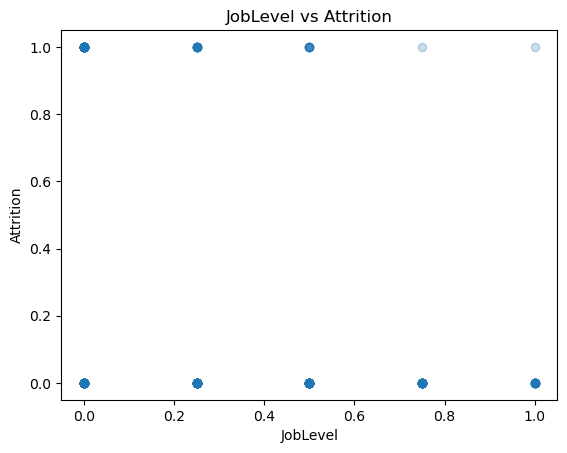

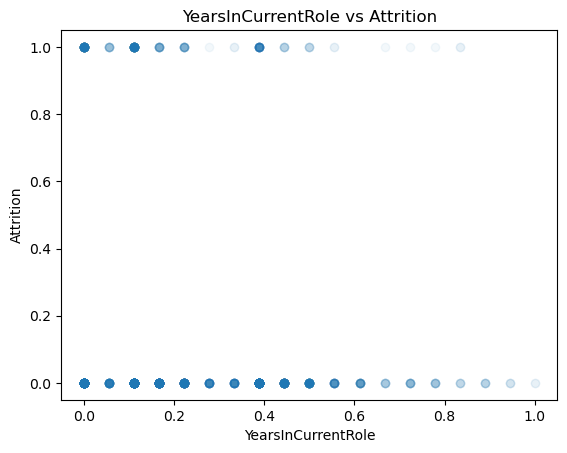

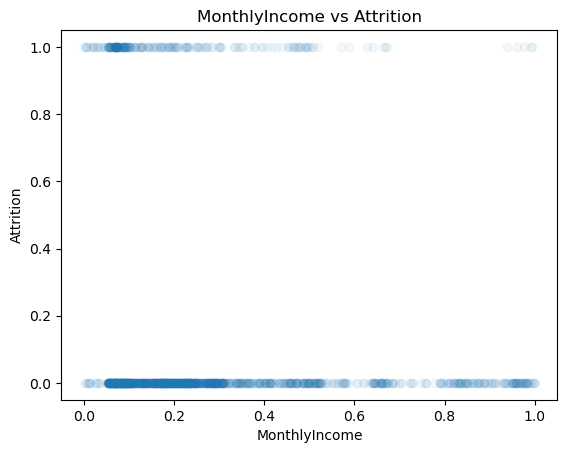

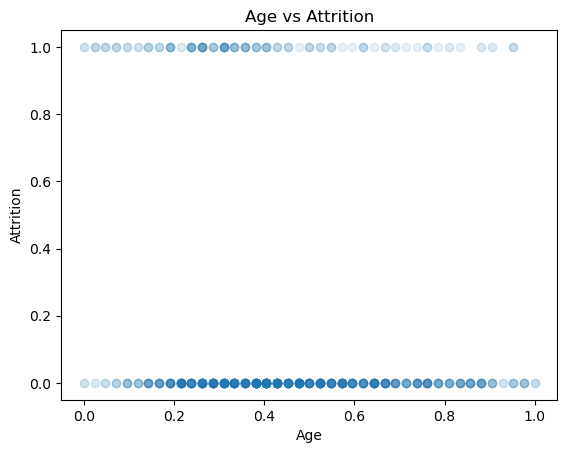

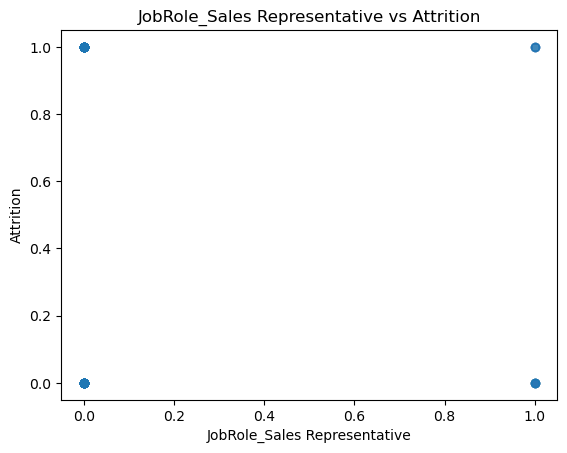

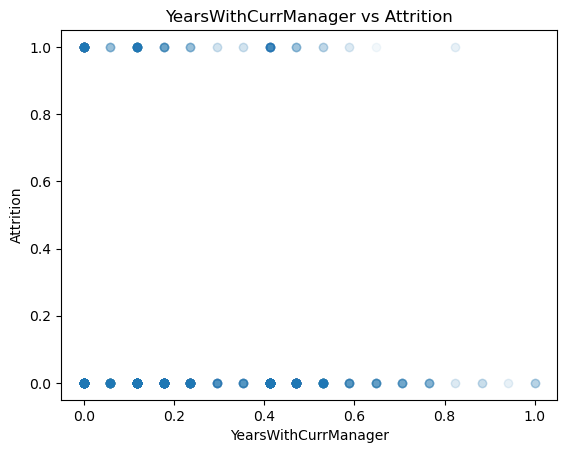

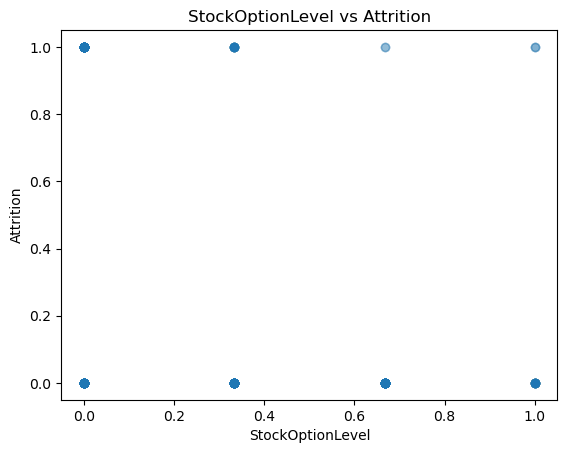

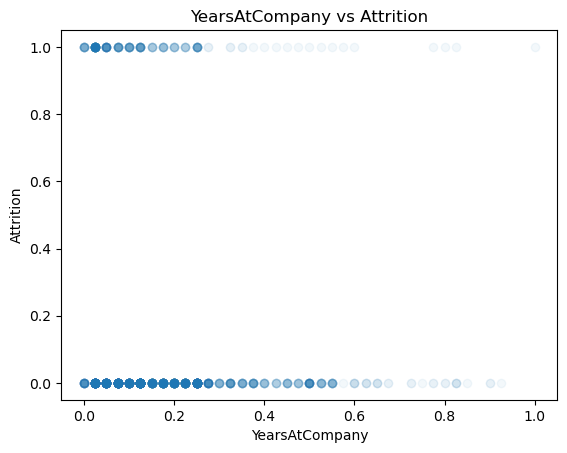

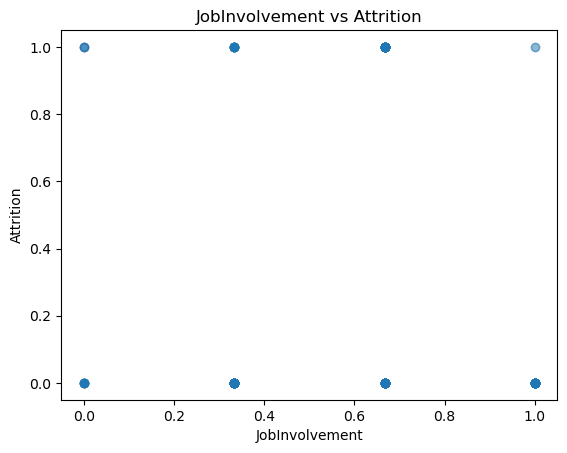

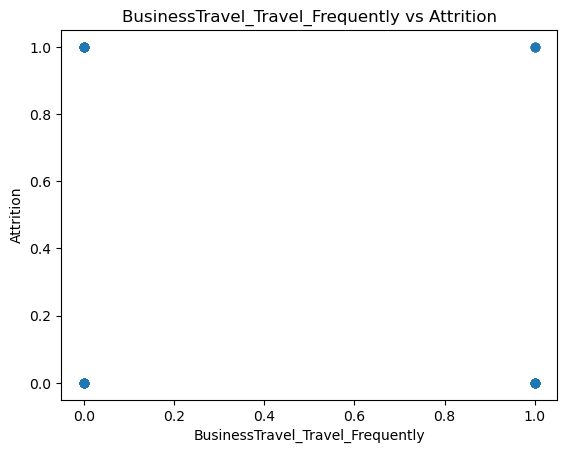

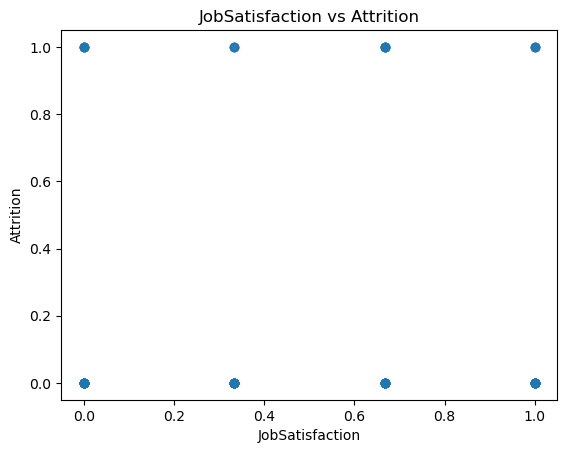

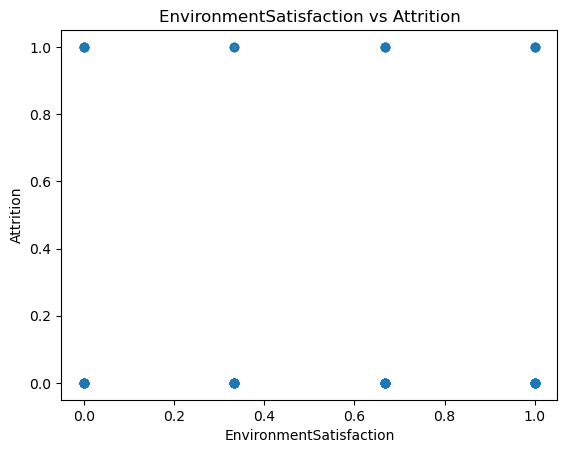

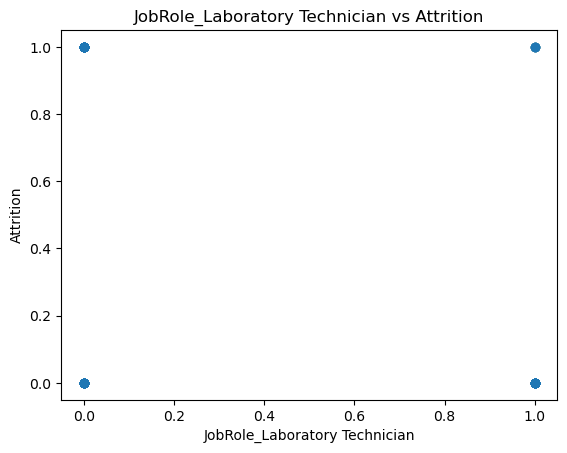

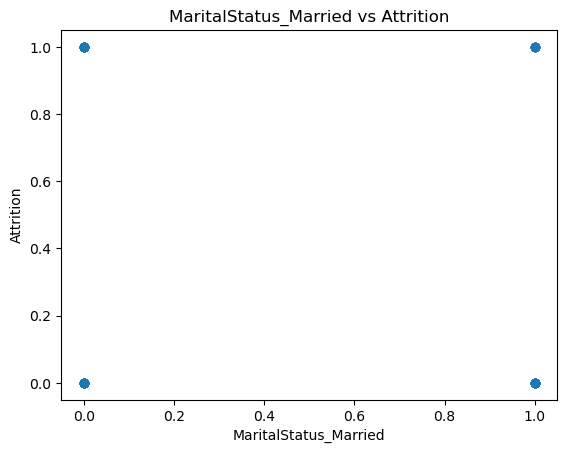

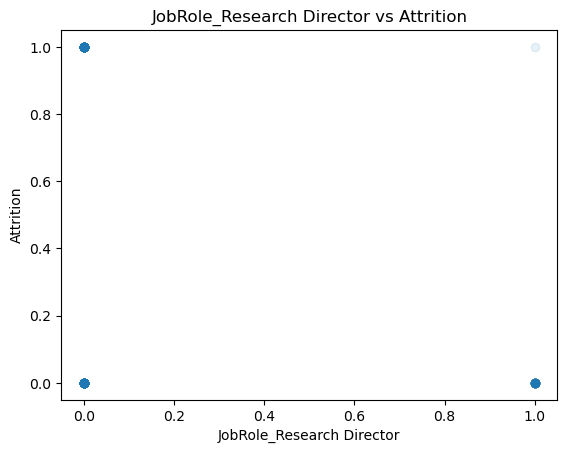

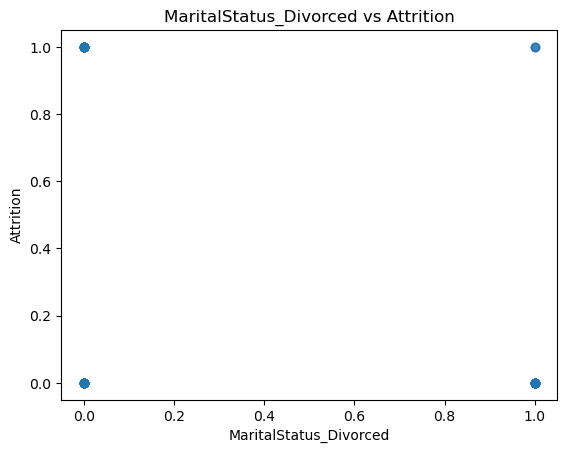

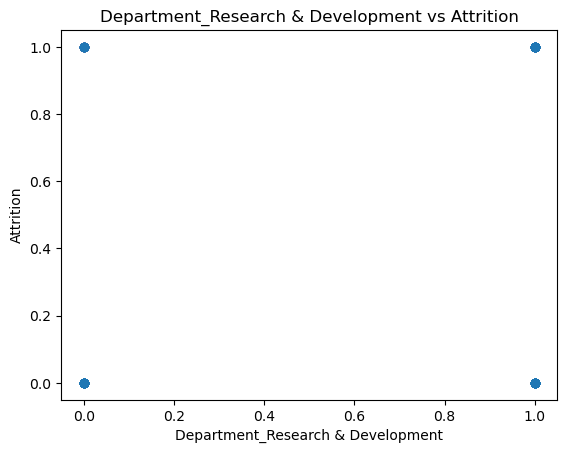

In [166]:
draw_scatter_plot(features_df, labels_df)

## Fitting the model

In [167]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = features_df.to_numpy()
y = labels_df.to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.88
